## Read data

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

################################## Enter your code below ######################


(406, 9)


In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
import matplotlib.pyplot as plt

## 1. Có bao nhiêu ô tô và bao nhiêu thuộc tính trong tập dữ liệu?

In [ ]:
data.duplicated().sum()

0

Theo dữ liệu đọc được, dữ liệu không bị lặp và có 406 dòng dữ liệu => Có 406 loại xe với các thông số kỹ thuật khác nhau với 9 thuộc tính dữ liệu: tên xe, phiên bản, model, động cơ, trọng lượng, mã lực, dung tích xi lanh, số xi lanh và MPG (số dặm đi được cho 1 gallon).

## 2. Có bao nhiêu công ty xe hơi riêng biệt được đại diện trong tập dữ liệu? Tên của chiếc xe có MPG tốt nhất là gì? Hãng xe nào sản xuất nhiều xe 8 xi lanh nhất? Xe 3 xi-lanh có tên là gì? Thực hiện một số tìm kiếm trên internet có thể cho bạn biết về lịch sử và sự phổ biến của những chiếc xe 3 xi-lanh.

In [ ]:
 data['car_name'].str.split().apply(lambda x : x[0]).nunique()

38

Có 38 thương hiệu xe hơi riêng biệt được thu thập trong tập dữ liệu.

In [ ]:
data[data['mpg']==data['mpg'].max()]['car_name'].values

array(['mazda glc'], dtype=object)

Chiếc xe có MPG tốt nhất là Mazda GLC.

In [ ]:
data[data['cylinders']==8]['car_name'].str.split().apply(lambda x : x[0]).value_counts().idxmax()

'ford'

Hãng xe sản xuất nhiều xe 8 xi lanh nhất là Ford.

In [ ]:
data[data['cylinders']==3].value_counts('car_name')

car_name
mazda rx2 coupe    1
mazda rx-7 gs      1
mazda rx-4         1
maxda rx3          1
dtype: int64

Vậy có các loại xe có 3 xi lanh gồm:
- Mazda RX2 Coupe
- Mazda RX-7 GS
- Mazda RX-4
- Maxda RX3

### Lịch sử xe 3 xi lanh

Ô tô sử dụng động cơ xăng 3 xi-lanh tại thị trường Việt Nam được coi là kinh tế. Mức độ bảo trì thấp và cung cấp hiệu suất tốt cũng như những chiếc xe sử dụng động cơ 4 xi-lanh. Công nghệ phát triển và sản xuất động cơ sử dụng 3 xi-lanh không có nghĩa là sức mạnh sẽ suy giảm theo bất kỳ cách nào. Bởi vì dung tích xi lanh kết hợp cũng có thể làm gần với động cơ 4 xi-lanh.

Những động cơ 3 xi lanh mạnh mẽ nhất hiện nay gồm: Honda Civic 1.0 VTEC (Đây là một trong những động cơ 3 xi lanh mạnh mẽ nhất mà nhiều người có thể mua lúc này. Nó sản sinh công suất 120 mã lực tại vòng quay 5.500 vòng/phút và mô men xoắn cực đại 200Nm); Peugeot 308 1.2 Puretech (Động cơ PureTech, tăng áp, 3 xi lanh 1.2 L của Peugeot tập trung vào sự tinh tế bởi vậy động cơ này không hề gây ồn ào); Mini Cooper 133 mã lực/ 220 Nm; Ford Fiesta ST Line 1.0 EcoBoost; Volvo XC40 1.5 L T3; BMW i8;...


## 3. Phạm vi, giá trị trung bình và độ lệch chuẩn của từng thuộc tính là gì?

In [ ]:
df = data.dropna()

In [ ]:
df.iloc[:,:6].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [ ]:
df.iloc[:,6:].astype('category').describe()

,model,origin,car_name
count,392.0,392.0,392
unique,13.0,3.0,301
top,73.0,1.0,ford pinto
freq,40.0,245.0,5


## 4. Vẽ biểu đồ cho từng thuộc tính.

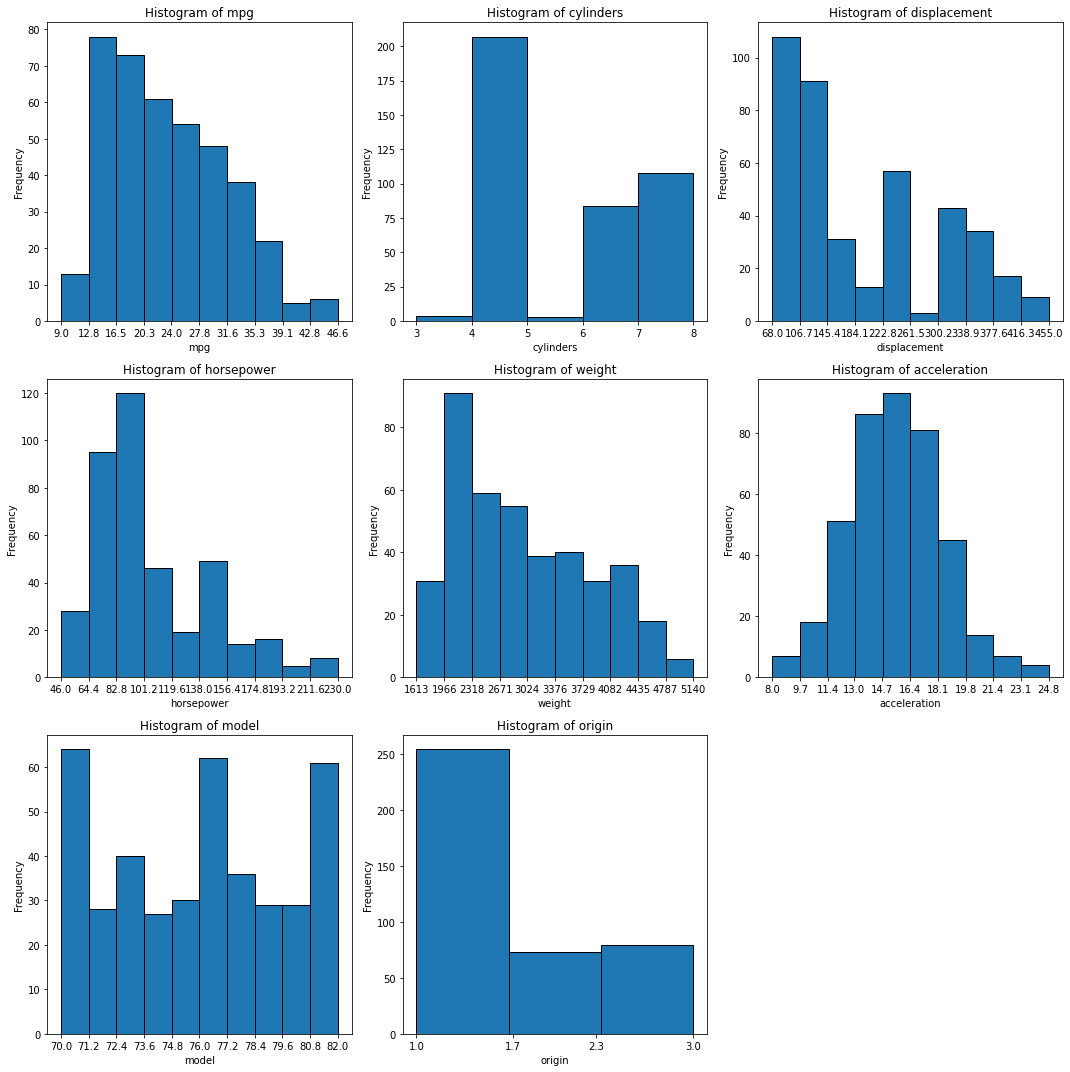

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, bins):
    fig = plt.figure(figsize=(15,15))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        hist = ax.hist(df[var_name], bins=bins[i], edgecolor='black')
        ax.set_title('Histogram of ' + var_name)
        ax.set_xlabel(var_name)
        ax.set_ylabel('Frequency')
        ax.set_xticks(hist[1].round(1));
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
bins=[10, 5, 10, 10, 10, 10, 10, 3]
draw_histograms(data, data.columns[:-1], 3, 3, bins)

Một số nhận xét thú vị về dữ liệu:
- Đa số xe sử dụng động cơ 4, 6, 8 xi lanh, trong đó động cơ 4 xi lanh là phổ biến nhất.
- Đa số các dòng xe đều hướng tới việc tiết kiệm nhiên liệu vì chúng có điểm MPG khá cao.
- Nhiều dòng xe đã ra đến phiên bản thứ 2, thứ 3 của nó cho thấy sự nâng cấp của nhiều dòng xe cũ.

## 5. Vẽ biểu đồ phân tán của trọng lượng so với thuộc tính MPG. Bạn kết luận gì về mối quan hệ giữa các thuộc tính? Hệ số tương quan giữa 2 thuộc tính là gì?

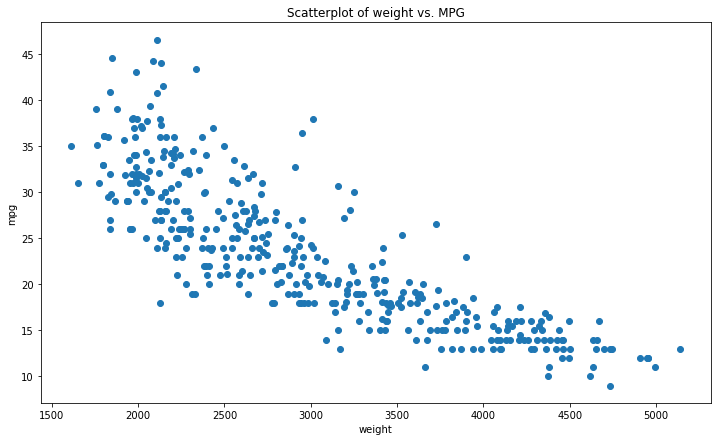

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(data['weight'], data['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('Scatterplot of weight vs. MPG')
plt.show()

Dễ dàng nhận thấy rằng 2 thuộc tính này có tương quan, liên hệ mật thiết với nhau. Cụ thể là chúng nghịch biến. Nghĩa là trọng lượng xe càng lớn thì MPG càng giảm (tức là đi được ít dặm hơn trên 1 gallon nhiên liệu); và ngược lại khi trọng lượng xe nhỏ thì điểm MPG của xe cao (xe đi được số dặm nhiều hơn). Điều này cũng hợp với lẽ tự nhiên bởi vì xe càng nặng lương nhiên liệu tiêu hao sẽ càng nhiều hơn.

In [ ]:
data['weight'].corr(data['mpg'])

-0.8317409332443352

Vậy hệ số tương quan giữa trọng lượng xe và MPG là -0.8317 cho thấy sự nghịch biến của 2 thuộc tính.

## 6. Vẽ biểu đồ phân tán của năm so với số xi lanh.

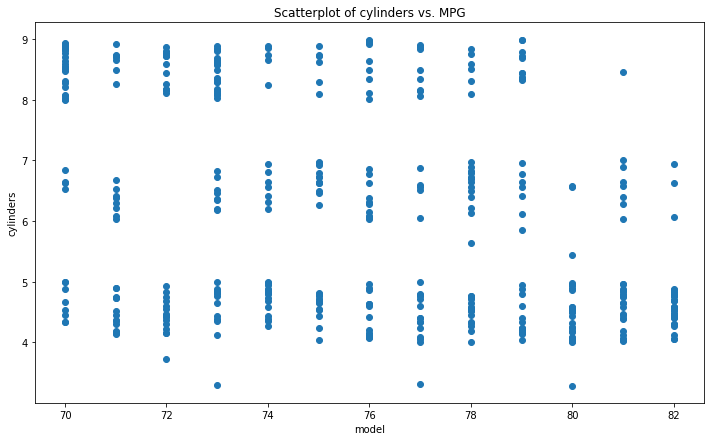

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(data['model'], data['cylinders'] + np.random.random(len(data['cylinders'])))
plt.xlabel('model')
plt.ylabel('cylinders')
plt.title('Scatterplot of cylinders vs. MPG')
plt.show()

Có thể thấy rằng các xe càng ra sau càng có xu hướng sử dụng ít xi lanh hơn các thế hệ xe trước. Các xe 8 hay 6 xi lanh dần không được áp dụng trong thực tế sản xuất nữa.

Lí do là vì từ những năm 1970 trở đi, các thế hệ ô tô mới đều có đặc điểm chủ yếu là nâng cao công suất, giảm mức tiêu thụ chất đốt, và khí gây ô nhiễm,... gia tăng vai trò của thiết bị điện tử (năm 1990 các hệ thống điện tử lắp đặt cho ô tô đã chiếm 6% giá tiền một xe, và con số này tời năm 2000 tăng gấp ba), các nỗ lực tăng tiện nghi , độ an tòan, sự hoàn thiện và trang thiết bị: chẳng hạn, đai an toàn (bắt buộc từ 1973 ở Pháp), hệ thống phanh ABS, đệm an toàn tự thổi phồng, hay Air Bags (được Mercédes tung ra thị trường lần đầu tiên vào năm 1981), ống xả xúc tác (do General Motors hoàn chỉnh năm 1974), nó trở thành bắt buộc ở nhiều nước công nghiệp.

Do đó việc giảm số xi lanh sử dụng trong các xe là xu hướng tất yếu để giảm lượng nhiên liệu tiêu thụ, giảm mức ô nhiễm môi trường,... Từ đó người ta đã tìm cách nâng cao công suất, hiệu suất động cơ thay vì tăng số xi lanh trong xe để tăng hiểu quả của động cơ.

## 7. Hiển thị thêm 2 biểu đồ phân tán mà bạn thấy thú vị.

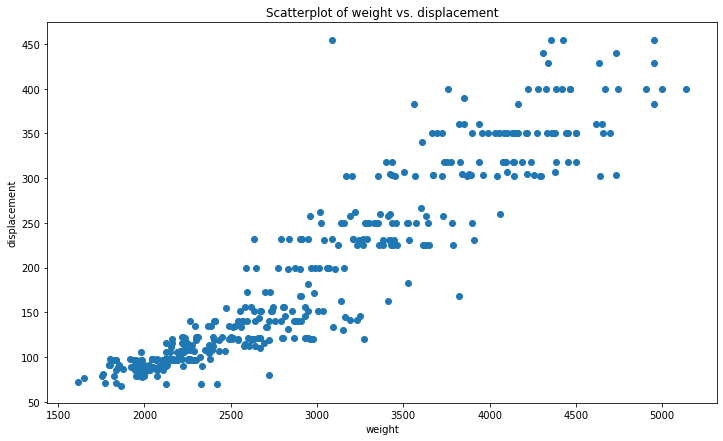

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(data['weight'], data['displacement'])
plt.xlabel('weight')
plt.ylabel('displacement')
plt.title('Scatterplot of weight vs. displacement')
plt.show()

Biểu đồ trên là biểu đồ scatter thể hiện tương quan giữa 2 thuộc tính trọng lượng và dung tích xi lanh của xe.

Cụ thể là 2 thuộc tính trên đồng biến, khi trọng lượng tăng thì dung tích xi lanh xe phải lớn để có thể tải được tải trọng lớn của xe; ngược lại xe nhẹ thì dễ di chuyển hơn nên chỉ cần xi lanh có dung tích vừa phải thích hợp với nó.

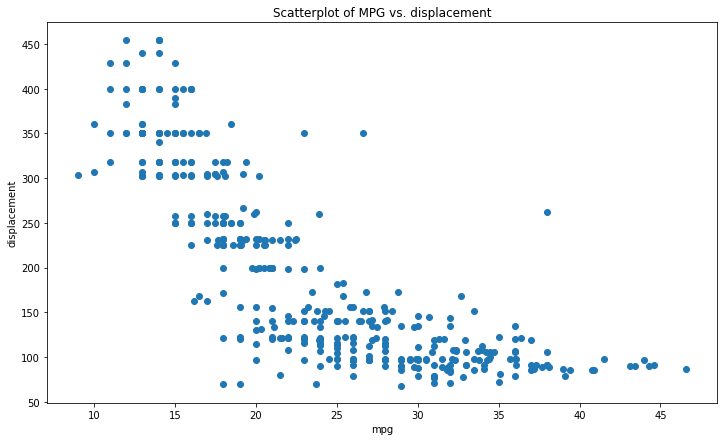

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(data['mpg'], data['displacement'])
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.title('Scatterplot of MPG vs. displacement')
plt.show()

Biểu đồ trên là biểu đồ scatter thể hiện tương quan giữa 2 thuộc tính MPG và dung tích xi lanh của xe.

Cụ thể là 2 thuộc tính trên nghịch biến. Với dung tích xi lanh lớn thì lượng nhiên liệu tiêu thụ lớn nên đánh giá MPG rất thấp. Vậy khi dung tích xi lanh nhỏ thì lượng nhiên liệu tiêu thụ cũng giảm nên điểm MPG tăng lên.

## 8. Vẽ một chuỗi thời gian cho tất cả các công ty để cho biết họ giới thiệu bao nhiêu chiếc xe mới trong mỗi năm.

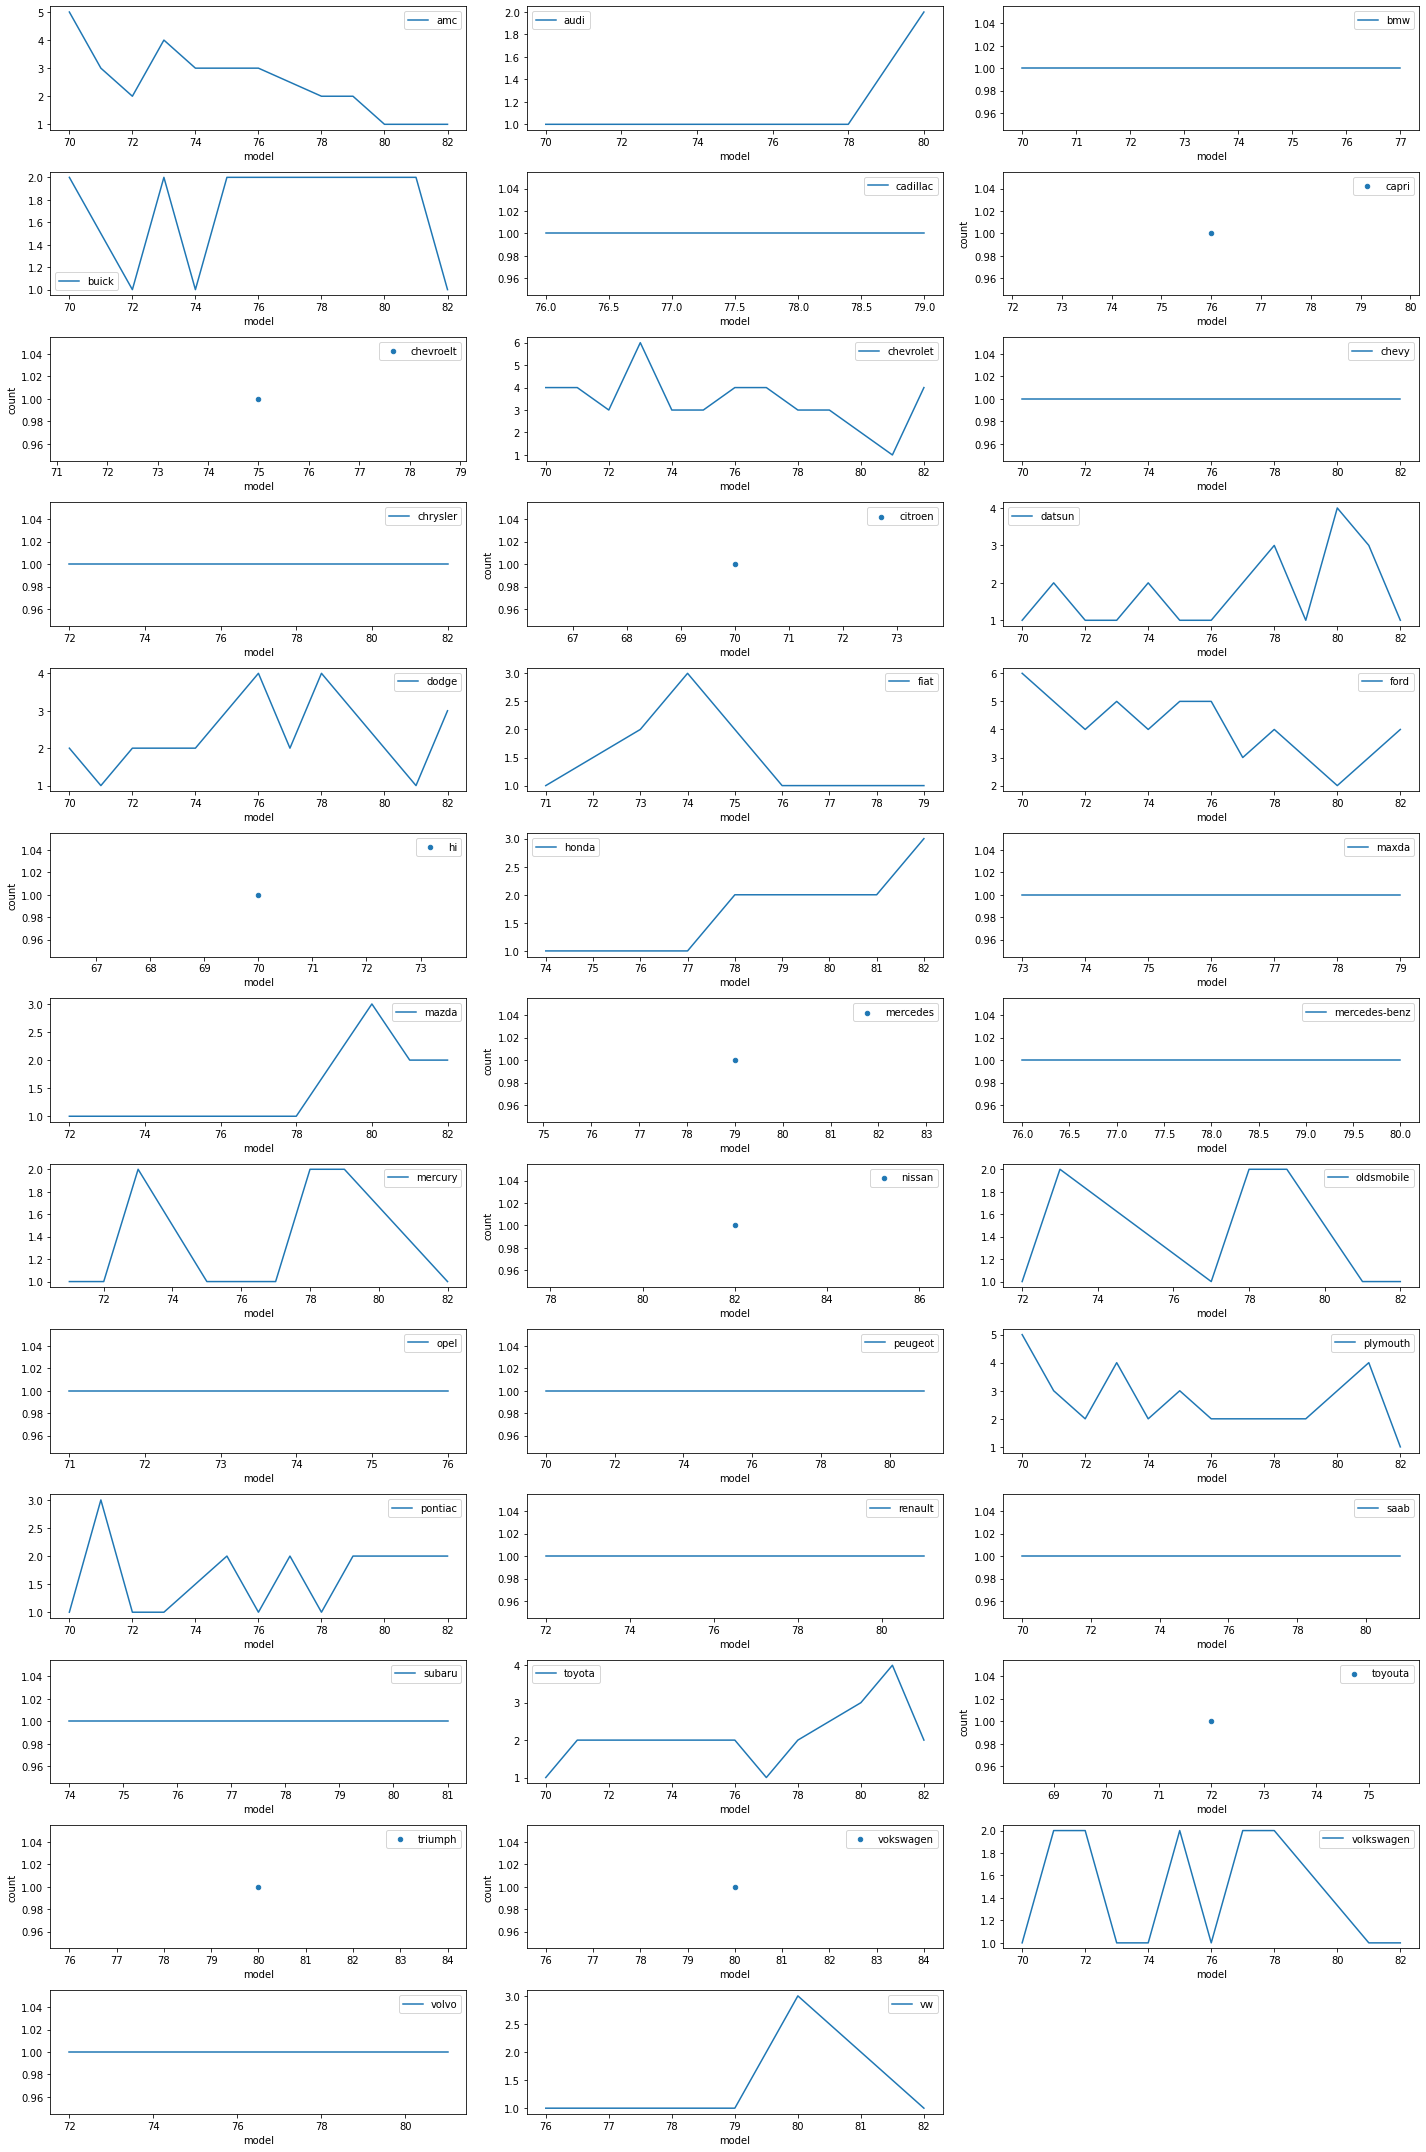

In [ ]:
df = data.copy()
df['company'] = data['car_name'].str.split().apply(lambda x : x[0])
company_count = pd.DataFrame(df.groupby('model')['company'].value_counts()).rename(columns={'company': 'count'}).reset_index()
#a = company_count.pivot(index='model', columns='company', values='count')

def draw_histograms(df, n_rows, n_cols):
    fig = plt.figure(figsize=(20,30))
    i = 0
    for key, grp in df.groupby(['company']):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        if len(grp) > 1:
          ax = grp.plot(ax=ax, kind='line', x='model', y='count', label=key)
        else:
          ax = grp.plot(ax=ax, kind='scatter', x='model', y='count', label=key)
        i = i+1

    fig.tight_layout() 
    plt.show()
draw_histograms(company_count, 13, 3)

- Các hãng xe đang còn hoạt động sẽ giới thiệu ít nhất 1 mẫu xe mới qua mỗi năm.
- Có một số hãng xe đã không còn hoặc tạm ngưng hoạt động (triumph, citroen, hi, chevroelt,...) vì họ đã không ra mẫu xe mới nào trong suốt thập niên 70 và những năm đầu thập niên 80.
- Những hãng xe còn hoạt động sôi nổi với nhiều mẫu xe mới mỗi năm như: pontiac, toyota, datsum, ford,...


## 9. Tính toán mối tương quan theo từng cặp và vẽ bản đồ nhiệt bằng Matplotlib.

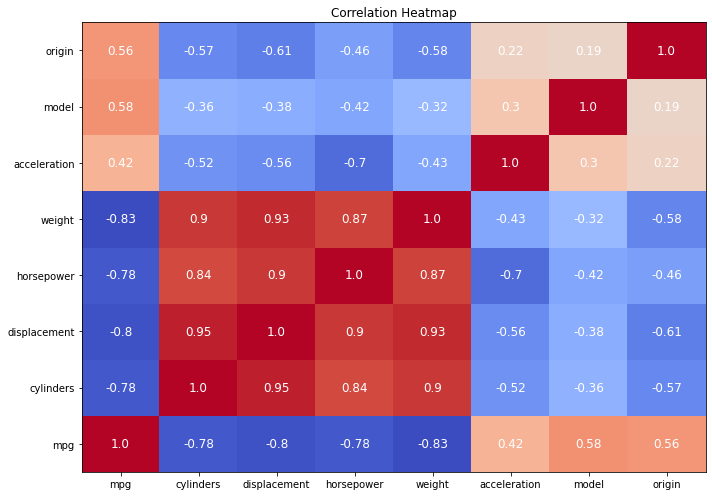

In [ ]:
corr = data.iloc[:,0:8].corr()
fig, ax = plt.subplots(figsize=(10,7))
plt.pcolor(corr, cmap="coolwarm")
# We want to show all ticks...
ax.set_xticks(np.arange(len(corr))+0.5)
ax.set_yticks(np.arange(len(corr))+0.5)

ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax.text(j+0.5, i+0.5, corr.iloc[i, j].round(2), ha="center", va="center", color="w", fontsize=12)

ax.set_title("Correlation Heatmap")
fig.tight_layout()
plt.show()

Một số nhận xét về mối tương quan giữa các thuộc tính thông qua heatmap trên:
- Có thể dễ dàng nhận thấy được các thuộc tính có tương quan cao, liên hệ mật thiết với nhau như: Giữa trọng lượng với số xi lanh, dung tích xi lanh, mã lực; giữa mã lực với số xi lanh, dung tích xi lanh; giữa số xi lanh và dung tích xi lanh (đồng biến); giữa MPG với trọng lượng, số xi lanh, dung tích xi lanh, mã lực (nghịch biến).
- Các thuộc tính ít tương quan như: giữa origin với modle và công suất động cơ; giữa modle và công suất động cơ,...
- Có thể thấy tính tương quan của chỉ số MPG với trọng lượng, số xi lanh, dung tích xi lanh, mã lực là khá cao. Vì vậy, để tăng chỉ số MPG (tức là giảm lượng nhiên liệu tiêu thụ của xe) ta cần xem xét tìm các công nghệ phù hợp để giảm bớt trọng lượng, số xi lanh, dung tích xi lanh, mã lực của động cơ xe.
- Và giữa các thuộc tính có tính tương quan cao với chỉ số MPG là trọng lượng, số xi lanh, dung tích xi lanh, mã lực của động cơ lại tương quan đồng biến với nhau nên khi xem xét giảm 1 yếu tố cũng có thể tự động kéo theo sự giảm của các yếu tố khác. Vì vậy có thể xem xét giảm đi các thuộc tính khác ở mức phù hợp để công suất mã lực của xe là lớn nhất có thể, phù hợp với tiêu chí của chiếc xe.